#Code

##Preparing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import numpy as np

In [ ]:
names = ['Apple Braeburn','Apple Golden','Apple Granny Smith','Apple Pink Lady','Apple Red Yellow',
        'Apricot','Avocado','Banana Red','Banana','Beetroot',
         'Blueberry','Cactus fruit','Cauliflower','Cherry Yellow','Coconut',
         'Corn or Maize','Daisy','Dandelion','Tulips','Watermelon'
]

In [ ]:
len(names)

20

In [ ]:
image_size = 227
img_channel = 3 #Ảnh màu RGB
batch_size = 64
color_mode = 'rgb'

##Data

In [ ]:
train_data = image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/DEEP/_Data/Fruit_Flower_Veg',
    labels = 'inferred', #lấy tên label là tên của thư mục
    label_mode = 'categorical', #phân lớp 2 biến đầu ra => nhị phân
    class_names = names,
    color_mode = color_mode,
    batch_size = batch_size,
    image_size = (image_size, image_size),
    interpolation = 'bilinear', #Thông số mặc định
)

Found 14985 files belonging to 20 classes.


In [ ]:
dev_data = image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/DEEP/_Data/Fruit_Flower_Veg',
    labels = 'inferred', #lấy tên label là tên của thư mục
    label_mode = 'categorical', #phân lớp 2 biến đầu ra => nhị phân
    class_names = names,
    color_mode = color_mode,
    batch_size = batch_size,
    image_size = (image_size, image_size),
    interpolation = 'bilinear', #Thông số mặc định
    subset = "validation",
    seed = 1,
    validation_split = 0.1,
)

Found 14985 files belonging to 20 classes.
Using 1498 files for validation.


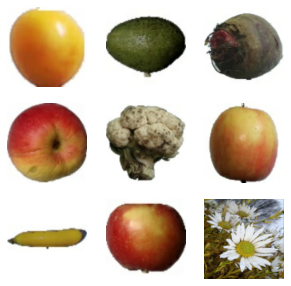

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (5,5))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
    plt.axis("off")

##AlexNet

In [ ]:
#https://www.youtube.com/watch?v=8GheVe2UmUM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import batch_normalization

import numpy as np

In [ ]:
image_shape = (227,227,3)
#np.random.seed(1000)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 96, input_shape = image_shape, kernel_size = (11,11), strides = (4,4), padding = 'valid' ))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))
model.add(Conv2D(filters = 256, kernel_size = (5,5), strides = (1,1),  padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))
model.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1),  padding = 'valid'))
model.add(Activation('relu'))
model.add(Conv2D(filters = 384, kernel_size = (3,3), strides = (1,1),  padding = 'valid'))
model.add(Activation('relu'))
model.add(Conv2D(filters = 256, kernel_size = (3,3), strides = (1,1),  padding = 'valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (3,3), strides = (2,2), padding = 'valid'))

model.add(Flatten())

model.add(Dense(4096, input_shape = (227*227*3,)))
model.add(Activation('relu'))

model.add(Dropout(0.4))

model.add(Dense(4096))
model.add(Activation('relu'))

model.add(Dropout(0.4))

model.add(Dense(len(names)))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 activation (Activation)     (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 23, 23, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                    

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [ ]:
history = model.fit(train_data, epochs= 10, validation_data= dev_data)

Epoch 1/10
235/235 [==============================] - 3280s 14s/step - loss: 2.5021 - accuracy: 0.3919 - val_loss: 0.8238 - val_accuracy: 0.6889
Epoch 2/10
235/235 [==============================] - 52s 217ms/step - loss: 0.5427 - accuracy: 0.7969 - val_loss: 0.4126 - val_accuracy: 0.8458
Epoch 3/10
235/235 [==============================] - 51s 213ms/step - loss: 0.3661 - accuracy: 0.8729 - val_loss: 0.2385 - val_accuracy: 0.9099
Epoch 4/10
235/235 [==============================] - 52s 214ms/step - loss: 0.2387 - accuracy: 0.9136 - val_loss: 1.7220 - val_accuracy: 0.6736
Epoch 5/10
235/235 [==============================] - 52s 215ms/step - loss: 0.3748 - accuracy: 0.8831 - val_loss: 0.2005 - val_accuracy: 0.9252
Epoch 6/10
235/235 [==============================] - 52s 215ms/step - loss: 0.1902 - accuracy: 0.9323 - val_loss: 0.3652 - val_accuracy: 0.9099
Epoch 7/10
235/235 [==============================] - 52s 215ms/step - loss: 0.2229 - accuracy: 0.9250 - val_loss: 0.1671 - val_ac

<Figure size 432x288 with 0 Axes>

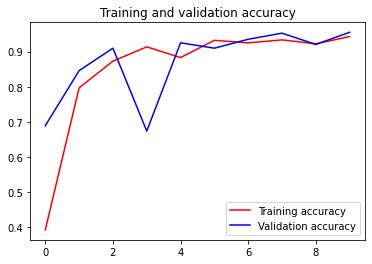

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import numpy as np

y_pred_total = []
y_true = []

for img, label in dev_data:
    y_pred = model.predict(img)
    y_pred_total += np.argmax(y_pred,axis=-1).tolist()
    y_true += np.array(np.argmax(label,axis=-1)).flatten().tolist()
    
print(accuracy_score(y_true, y_pred_total)*100)
print(f1_score(y_true, y_pred_total,average='macro')*100)
print(recall_score(y_true,y_pred_total,average='macro')*100)
print(precision_score(y_true,y_pred_total,average='macro')*100)

95.52736982643525
95.57270453630707
95.47620868335459
95.99868118514381


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_total, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        67
           1      0.969     1.000     0.984       124
           2      1.000     0.969     0.984        64
           3      1.000     1.000     1.000        59
           4      1.000     1.000     1.000       145
           5      1.000     1.000     1.000        75
           6      0.981     1.000     0.990        52
           7      0.969     1.000     0.984        63
           8      1.000     0.934     0.966        61
           9      1.000     1.000     1.000        65
          10      1.000     1.000     1.000        52
          11      0.972     0.986     0.979        71
          12      0.978     1.000     0.989        88
          13      1.000     1.000     1.000        77
          14      0.985     1.000     0.993        67
          15      0.982     0.982     0.982        57
          16      0.750     0.618     0.677        68
          17      0.688    

In [ ]:
model.save('model_AlexNet.h5')

#Predict

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(227, 227))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  image_predict = np.vstack([x])
  classes = model.predict(image_predict, batch_size=10)
  plt.imshow(img)

In [ ]:
  print(classes)

NameError: ignored

In [ ]:
names[np.argmax(classes)]